In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import gossipcat as gcat

# load data
wd = '/Users/ewenwang/Documents/practice_data/'
file = 'credit_card.csv'
data = pd.read_csv(wd+file)
data.head()

Using TensorFlow backend.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
target = 'Class'
features = [x for x in data.columns if x not in ['Class', 'Amount']]

In [14]:
cat = gcat.Glimpse(data, target, features)

In [29]:
print(round(len(data[data[target]==data[target].unique()[1]])/data.shape[0]*100, 2), '%')

0.17 %



Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null

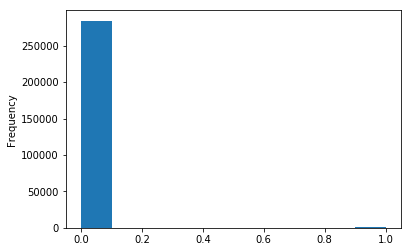

In [15]:
cat.Summary()

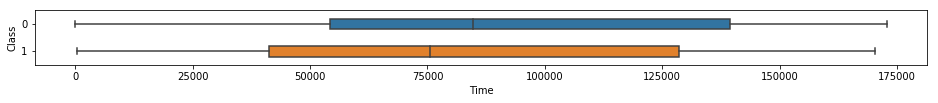

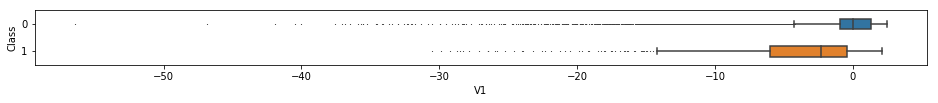

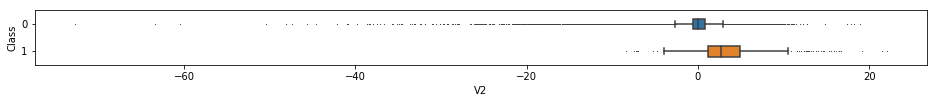

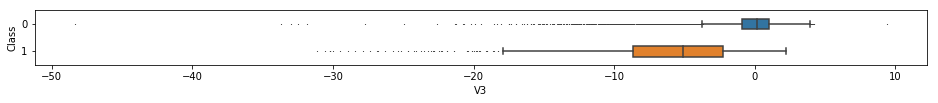

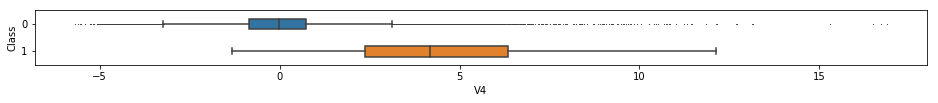

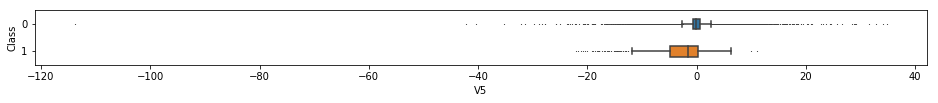

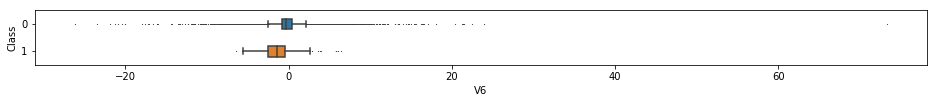

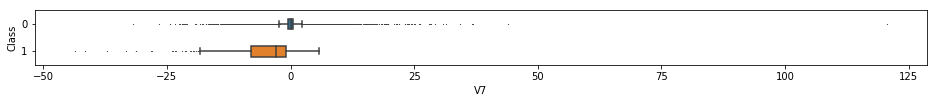

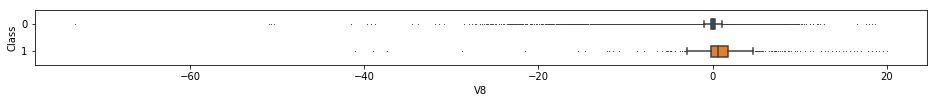

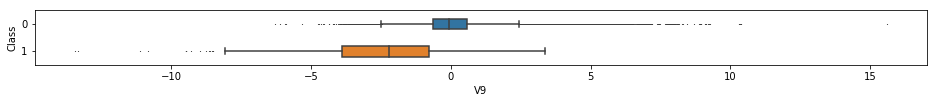

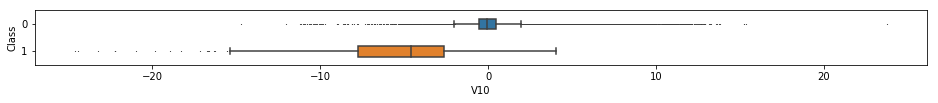

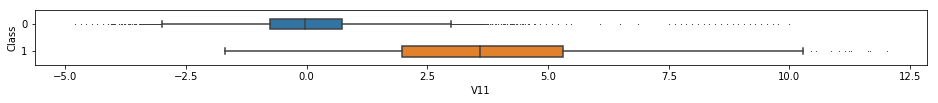

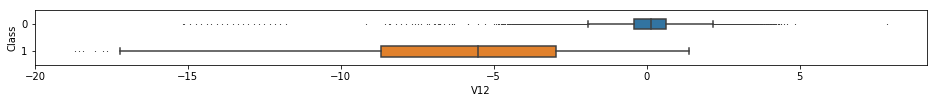

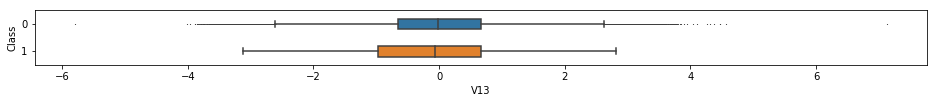

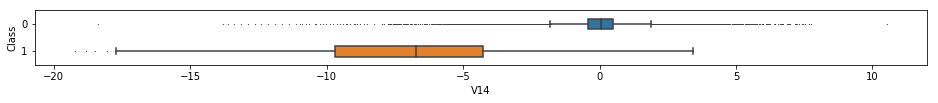

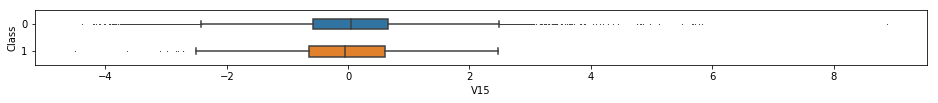

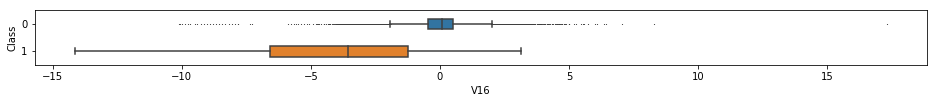

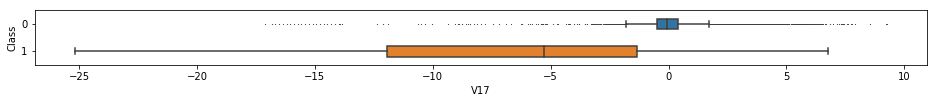

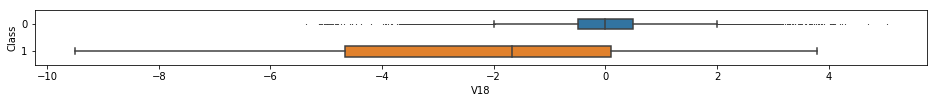

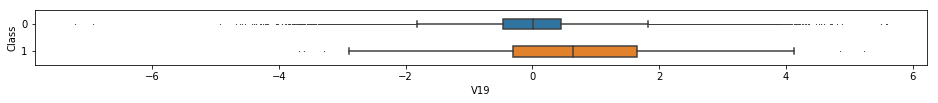

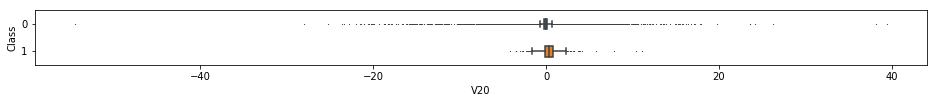

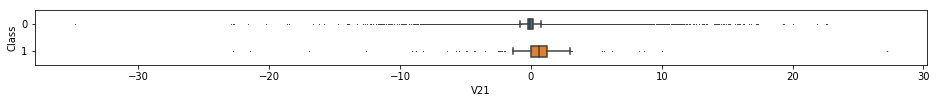

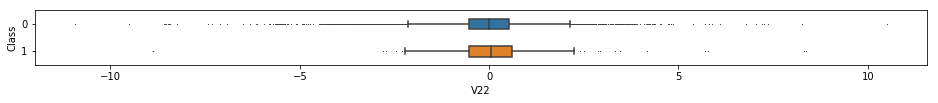

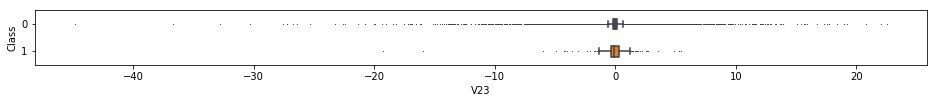

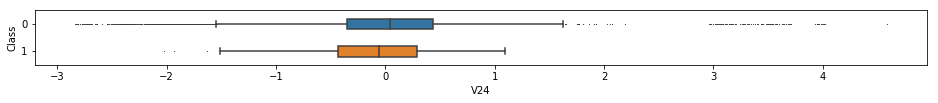

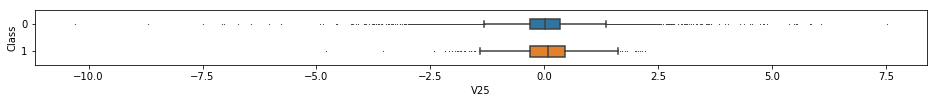

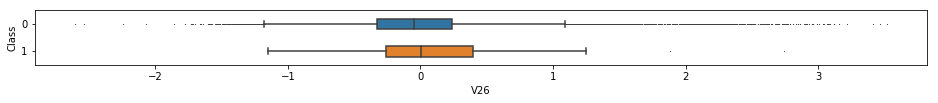

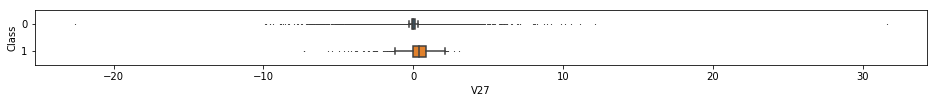

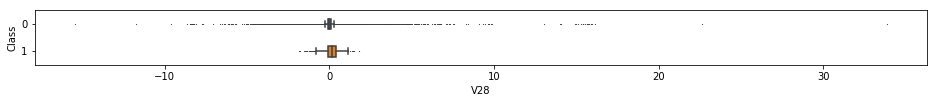

In [16]:
cat.BiBoxplot()

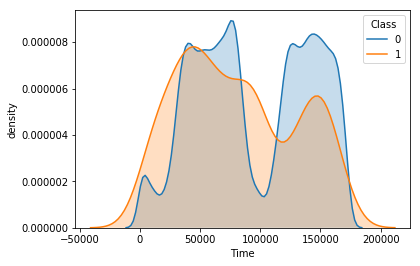

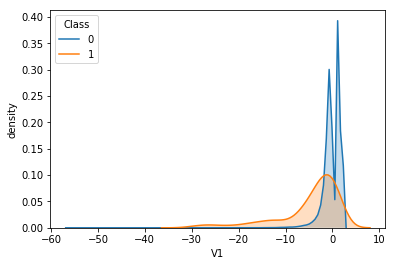

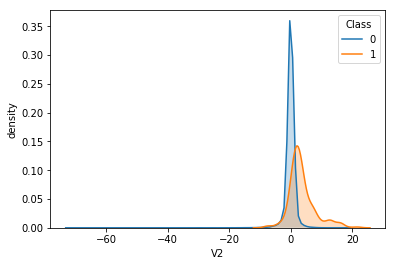

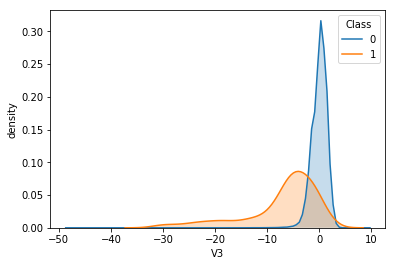

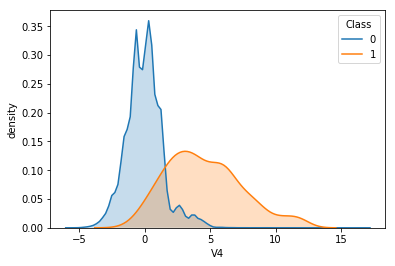

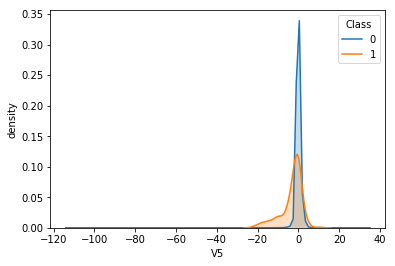

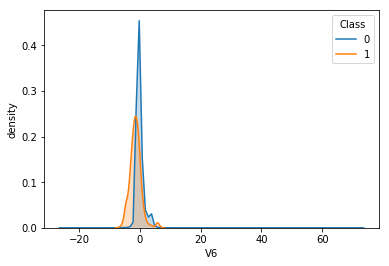

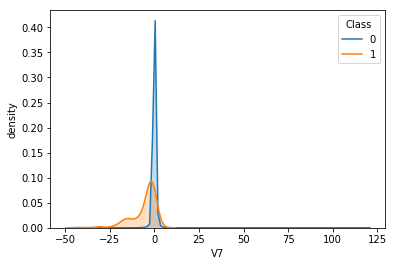

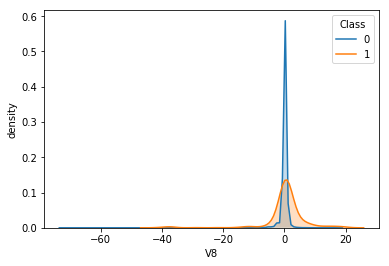

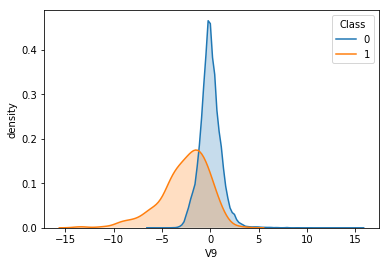

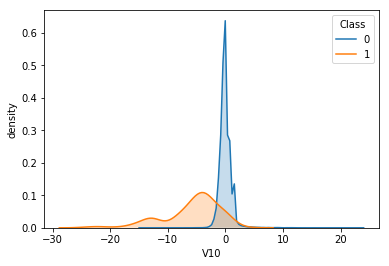

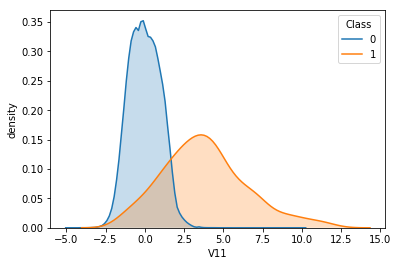

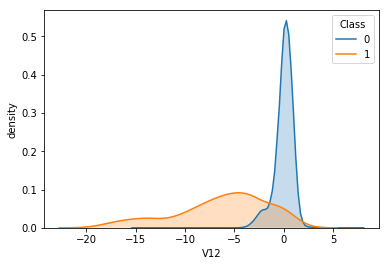

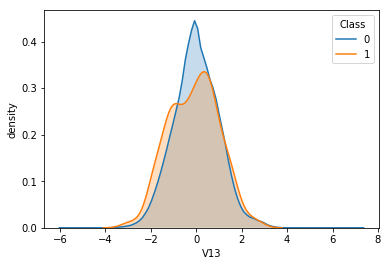

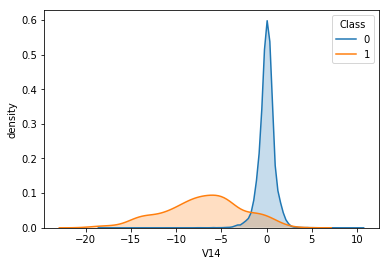

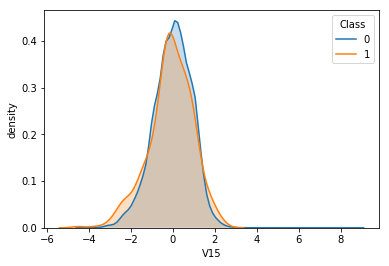

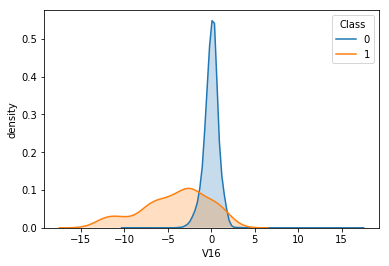

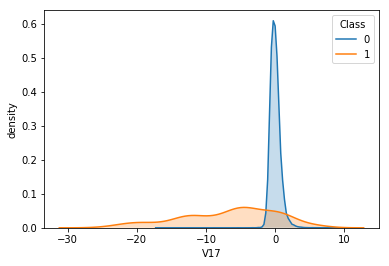

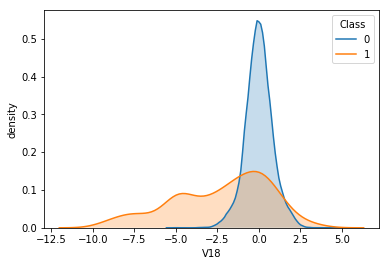

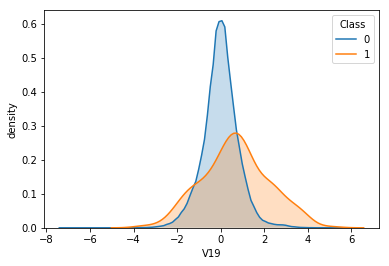

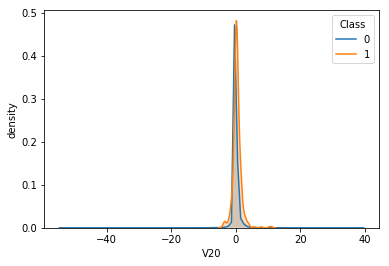

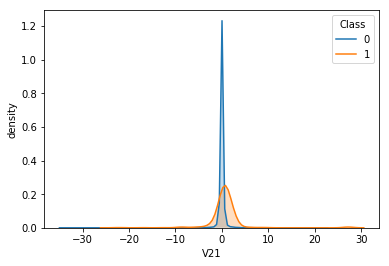

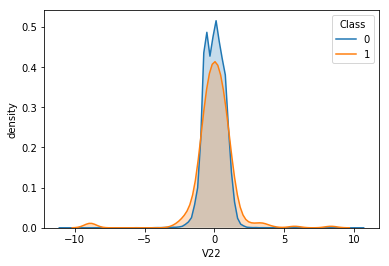

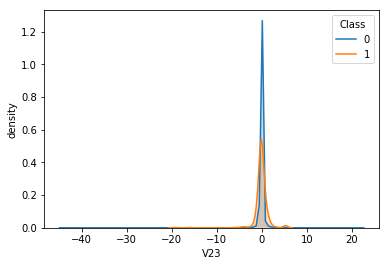

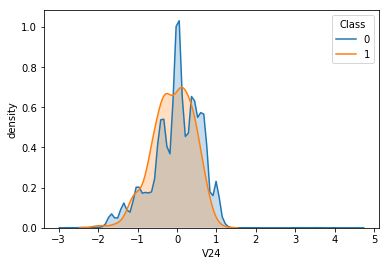

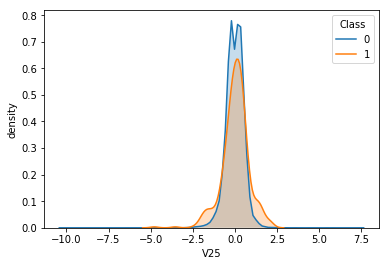

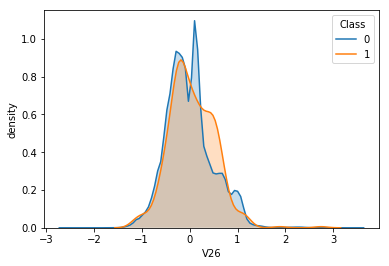

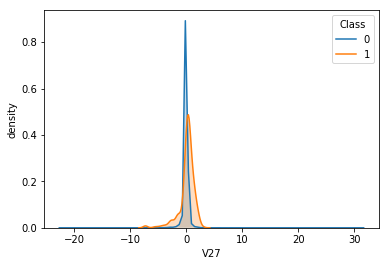

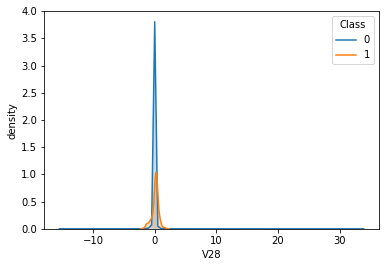

In [17]:
cat.BiDensity()

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=0)

In [18]:
base = gcat.Baseline(train, test, target, features)


predicting...

done.

Model Report
Accuracy : 0.999127
AUC Score (train): 0.797864
AUC Score (test): 0.791991
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56861
          1       0.86      0.58      0.69       101

avg / total       1.00      1.00      1.00     56962


Model Report
Recall metric in the testing dataset:  0.5841584158415841


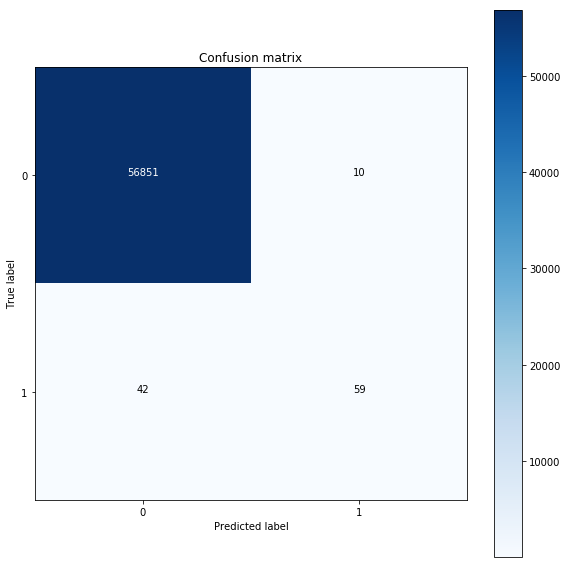

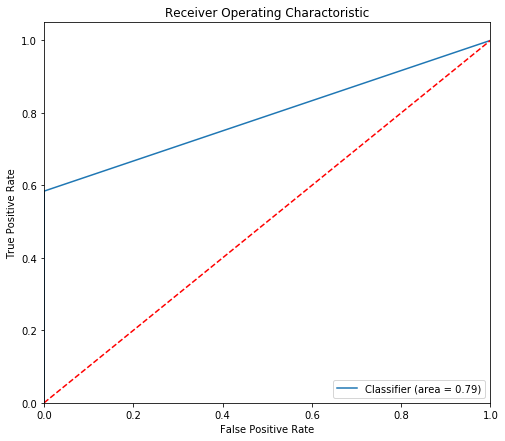


Model Report
Average Precision: 0.5002


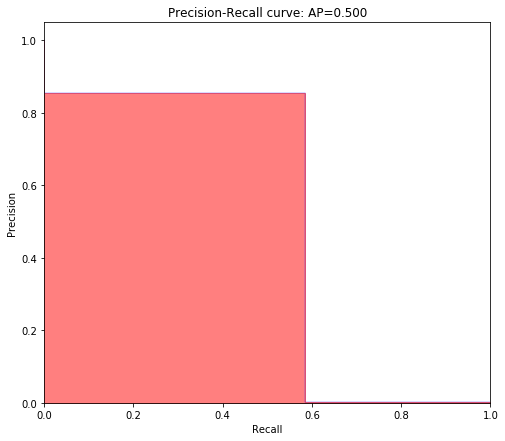

In [19]:
lr = base.LR()


predicting...

done.

Model Report
Accuracy : 0.999710
AUC Score (train): 0.915601
AUC Score (test): 0.886077
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56861
          1       0.92      0.77      0.84       101

avg / total       1.00      1.00      1.00     56962


Model Report
Recall metric in the testing dataset:  0.7722772277227723


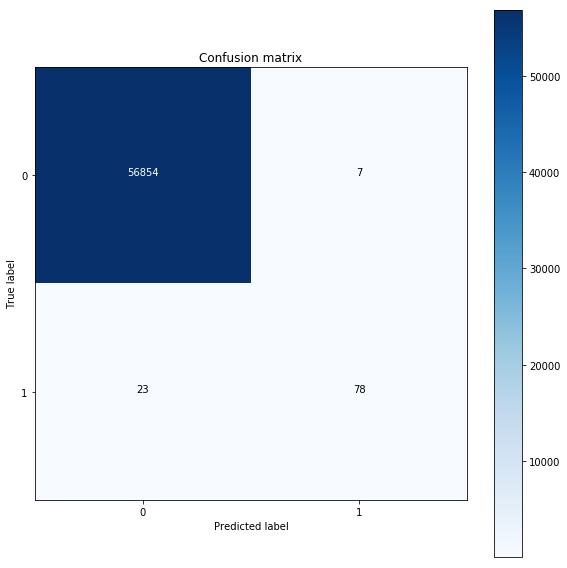

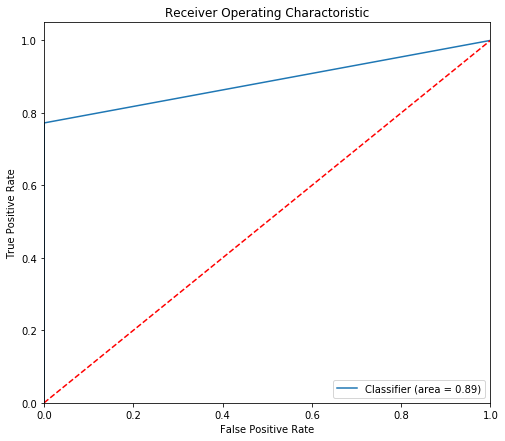


Model Report
Average Precision: 0.7091


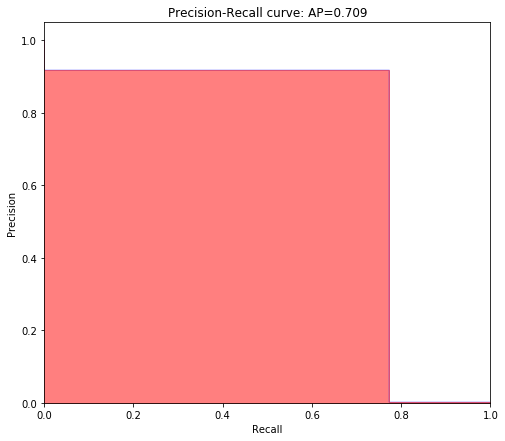

In [20]:
rf = base.RF()

Epoch 1/5
227845/227845 [==============================] - 65s 284us/step - loss: 0.0277 - acc: 0.9983
Epoch 2/5
227845/227845 [==============================] - 62s 274us/step - loss: 0.0277 - acc: 0.9983
Epoch 3/5
227845/227845 [==============================] - 56s 246us/step - loss: 0.0277 - acc: 0.9983
Epoch 4/5
227845/227845 [==============================] - 56s 244us/step - loss: 0.0277 - acc: 0.9983
Epoch 5/5
227845/227845 [==============================] - 56s 245us/step - loss: 0.0277 - acc: 0.9983

predicting...
56962/56962 [==============================] - 4s 73us/step

done.

Model Report
Accuracy : 0.998284
AUC Score (train): 0.500000
AUC Score (test): 0.500000
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56861
          1       0.00      0.00      0.00       101

avg / total       1.00      1.00      1.00     56962


Model Report
Recall metric in the testing dataset:  0.0


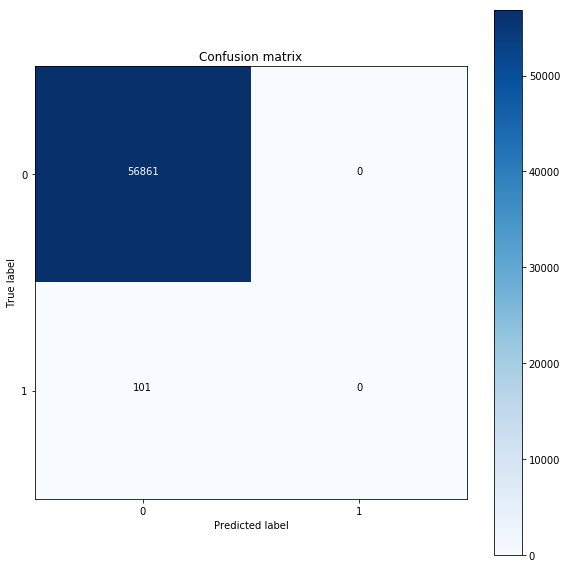

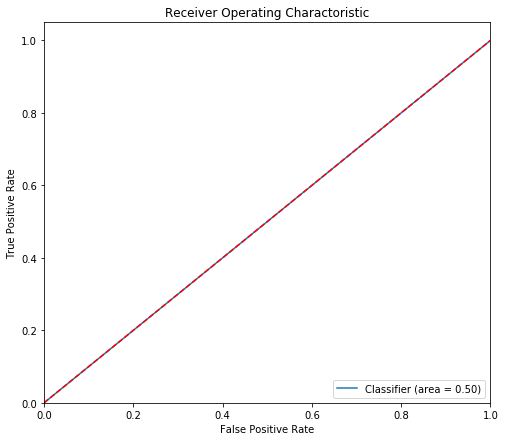


Model Report
Average Precision: 0.0018


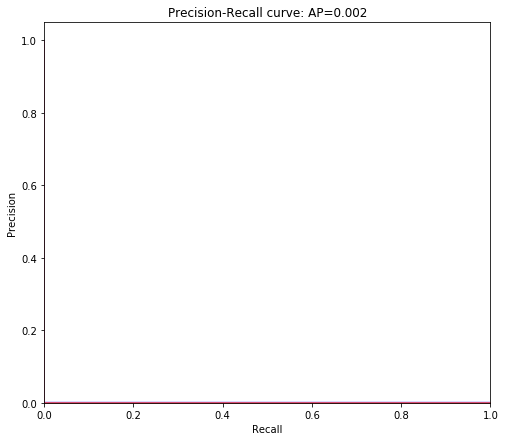

In [21]:
df = base.NN()